# TOPCAT-style Density Plots

This notebook demonstrates how to create density scatter plots that mimic the appearance of plots from [TOPCAT](http://www.star.bris.ac.uk/~mbt/topcat/), a popular tool for astronomical catalog visualization.

**Key features:**
- Points colored by local density (denser regions are darker/more saturated)
- Densest points plotted on top so they're always visible
- Truncated colormaps to avoid washed-out colors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Install the utilities:
from topcat_scatter_utils import calculate_density, truncate_colormap, plot_density_scatter


In [2]:
# Create some data
x = np.random.randn(5000)
y = x * 3 + np.random.randn(5000)

### plt.scatter default

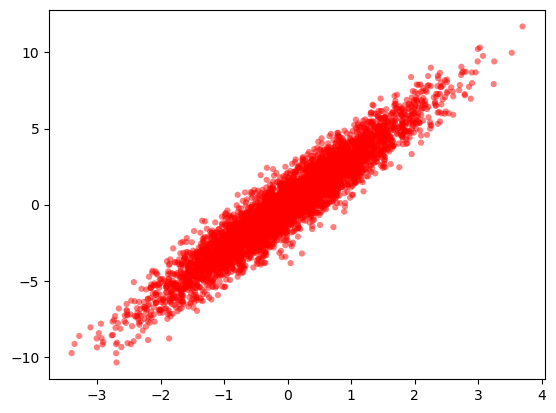

In [3]:
plt.scatter(x, y, s=20, alpha=0.5, c='red', edgecolor='none')

## Three ways of using these utilities

### 1: Quickly, using the convenience defaults

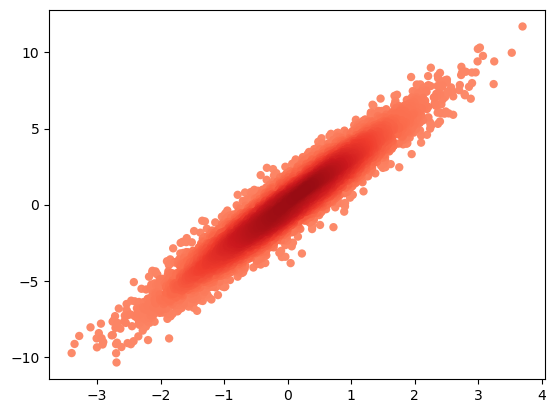

In [4]:
plot_density_scatter(x, y)

### 2: Modifying the convenience function

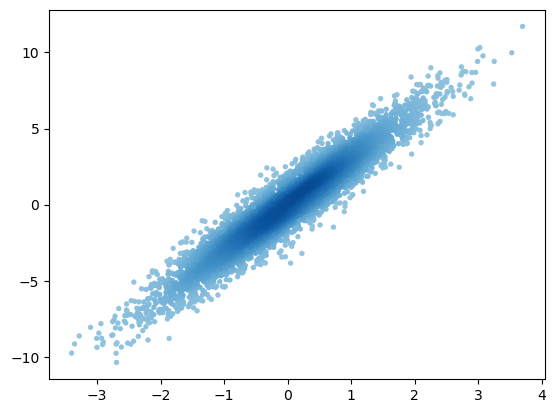

In [5]:
plot_density_scatter(x, y, cmap='Blues', minval=0.4, maxval=0.9, s=15)

### 3: Full control, using the functions separately

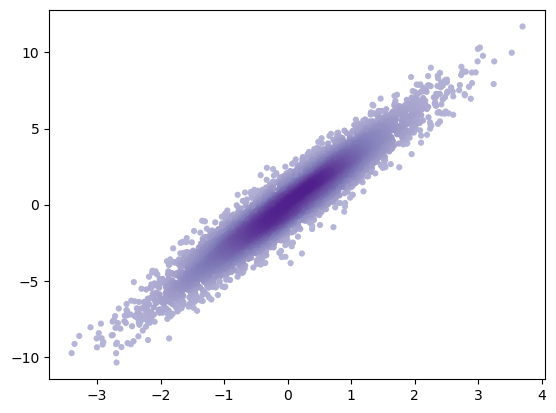

In [6]:
x_sorted, y_sorted, density = calculate_density(x, y)
cmap_t = truncate_colormap('Purples',0.4,0.9)

plt.scatter(x_sorted, y_sorted, c=density, cmap=cmap_t, s=20, edgecolor='None')

## Bandwidth examples

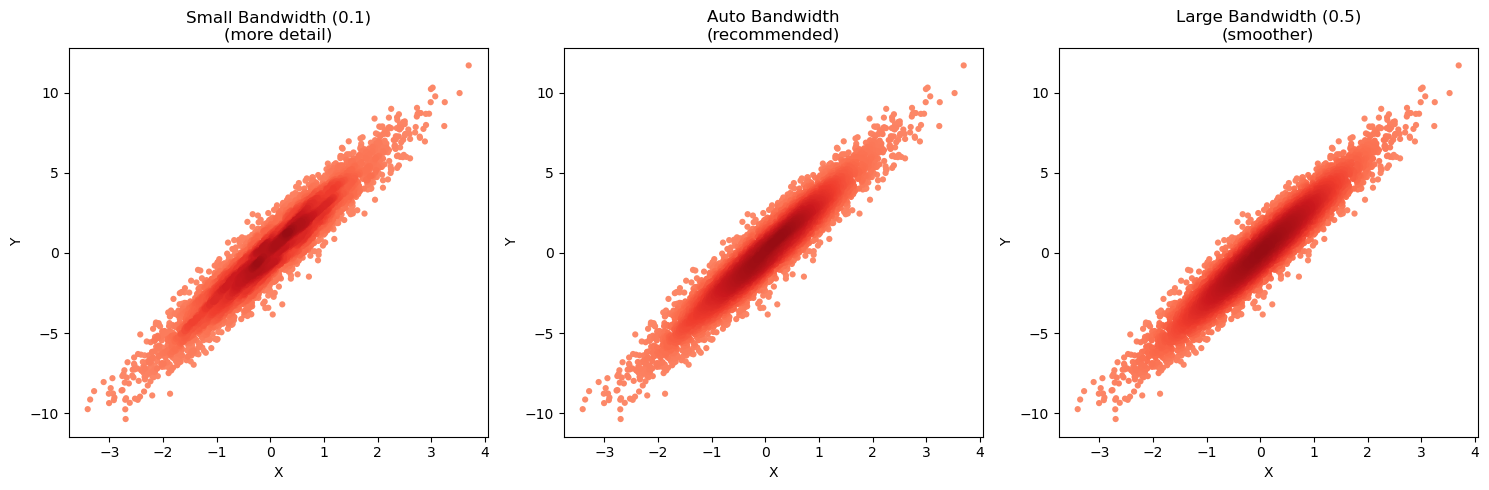

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
bandwidths = [0.1, None, 0.5]  # Small, auto, large
titles = ['Small Bandwidth (0.1)\n(more detail)', 
         'Auto Bandwidth\n(recommended)', 
         'Large Bandwidth (0.5)\n(smoother)']

for ax, bw, title in zip(axes, bandwidths, titles):
    plot_density_scatter(x, y, bandwidth=bw, s=20, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()